In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

In [125]:
auto = pd.read_csv("/content/autoscout24-germany-dataset.csv")


In [126]:
auto.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011


Обнаружение пропусков

In [127]:
auto.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46405 entries, 0 to 46404
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    46405 non-null  int64  
 1   make       46405 non-null  object 
 2   model      46262 non-null  object 
 3   fuel       46405 non-null  object 
 4   gear       46223 non-null  object 
 5   offerType  46405 non-null  object 
 6   price      46405 non-null  int64  
 7   hp         46376 non-null  float64
 8   year       46405 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 15.4 MB


1. Визуализация пропущеных данных с помощью тепловой карты

<Axes: >

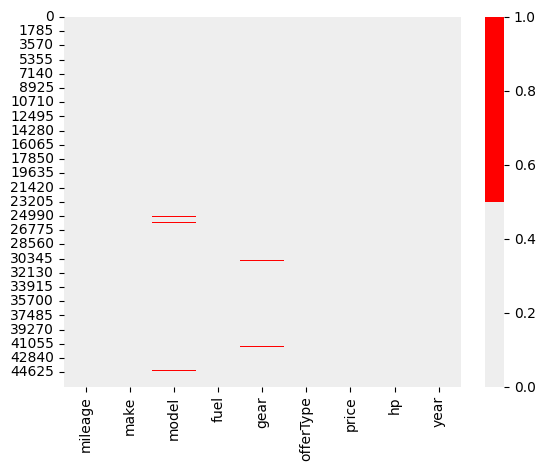

In [128]:
cols = auto.columns[:]
colours = ['#eeeeee', '#ff0000']
sns.heatmap(auto[cols].isnull(), cmap=sns.color_palette(colours))

2. наличие нулевых значений

In [129]:
auto.isnull().any()

mileage      False
make         False
model         True
fuel         False
gear          True
offerType    False
price        False
hp            True
year         False
dtype: bool

3. количество нулевых значений по столбцам

In [130]:
for col in auto.columns:
    pct_missing = auto[col].isnull().sum()
    print('{} - {}'.format(col, round(pct_missing)))

mileage - 0
make - 0
model - 143
fuel - 0
gear - 182
offerType - 0
price - 0
hp - 29
year - 0


4. процент нулевых значений по столбцам


In [131]:
for col in auto.columns:
    pct_missing = np.mean(auto[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

mileage - 0%
make - 0%
model - 0%
fuel - 0%
gear - 0%
offerType - 0%
price - 0%
hp - 0%
year - 0%


Замена нулевых значений наиболее часто встречающимся значением

In [132]:
categorical_cols = ['make', 'model']
for col in categorical_cols:
    auto[col] = auto[col].fillna(auto[col].mode()[0])

mileage - 0
make - 0
model - 0
fuel - 0
gear - 182
offerType - 0
price - 0
hp - 29
year - 0


<Axes: >

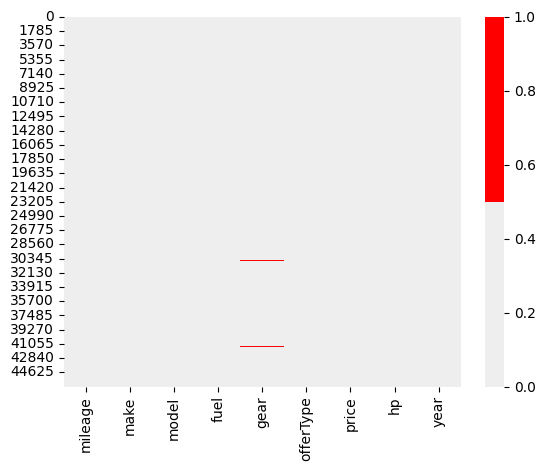

In [133]:
for col in auto.columns:
    pct_missing = auto[col].isnull().sum()
    print('{} - {}'.format(col, round(pct_missing)))

#проверка тепловой картой
cols = auto.columns[:]
colours = ['#eeeeee', '#ff0000']
sns.heatmap(auto[cols].isnull(), cmap=sns.color_palette(colours))

In [134]:
auto = auto.dropna(subset=['gear'])
auto = auto.dropna(subset=['hp'])

тип данных датасета

In [135]:
auto.dtypes

mileage        int64
make          object
model         object
fuel          object
gear          object
offerType     object
price          int64
hp           float64
year           int64
dtype: object

In [136]:
#значения
auto['gear'].value_counts()

Manual            30364
Automatic         15777
Semi-automatic       56
Name: gear, dtype: int64

In [137]:
#заменены на числа
auto["gear"]=auto["gear"].map({"Manual": 1, "Automatic": 2, "Semi-automatic":3})
auto.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,1,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,1,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,1,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,1,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,1,Used,6950,156.0,2011


In [138]:
#offerType по моему мнению не сильно важен, можно удалить
auto =auto.drop(["offerType"],axis=1)
auto.head()

,mileage,make,model,fuel,gear,price,hp,year
0,235000,BMW,316,Diesel,1,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,1,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,1,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,1,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,1,6950,156.0,2011


In [139]:
auto['fuel'].value_counts()

Gasoline             28787
Diesel               15200
Electric/Gasoline     1154
Electric               689
LPG                    125
CNG                    117
Electric/Diesel         53
Others                  47
-/- (Fuel)              22
Ethanol                  2
Hydrogen                 1
Name: fuel, dtype: int64

In [140]:
#заменены на числа
values_to_drop = ['-/- (Fuel)', 'Ethanol', 'Hydrogen']
auto = auto[~auto['fuel'].isin(values_to_drop)]

fuel_mapping = {"Gasoline": 1, "Diesel": 2, "Electric/Gasoline": 3, "Electric": 4, "LPG": 5, "CNG": 6, "Electric/Diesel": 7, "Others":8}
auto.loc[:, 'fuel'] = auto['fuel'].map(fuel_mapping)
auto.head()

<ipython-input-140-1cad8db1bd1b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auto.loc[:, 'fuel'] = auto['fuel'].map(fuel_mapping)
<ipython-input-140-1cad8db1bd1b>:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  auto.loc[:, 'fuel'] = auto['fuel'].map(fuel_mapping)


,mileage,make,model,fuel,gear,price,hp,year
0,235000,BMW,316,2,1,6800,116.0,2011
1,92800,Volkswagen,Golf,1,1,6877,122.0,2011
2,149300,SEAT,Exeo,1,1,6900,160.0,2011
3,96200,Renault,Megane,1,1,6950,110.0,2011
4,156000,Peugeot,308,1,1,6950,156.0,2011


In [141]:
#преобразование строк в числа
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
auto['model'] = le.fit_transform(auto['model'])
print(auto.head())

   mileage        make  model  fuel  gear  price     hp  year
0   235000         BMW     33     2     1   6800  116.0  2011
1    92800  Volkswagen    394     1     1   6877  122.0  2011
2   149300        SEAT    322     1     1   6900  160.0  2011
3    96200     Renault    506     1     1   6950  110.0  2011
4   156000     Peugeot     32     1     1   6950  156.0  2011


In [142]:
#преобразование строк в числа
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
auto['make'] = le.fit_transform(auto['make'])
print(auto.head())

   mileage  make  model  fuel  gear  price     hp  year
0   235000     8     33     2     1   6800  116.0  2011
1    92800    69    394     1     1   6877  122.0  2011
2   149300    62    322     1     1   6900  160.0  2011
3    96200    60    506     1     1   6950  110.0  2011
4   156000    55     32     1     1   6950  156.0  2011


In [143]:
auto.dtypes

mileage      int64
make         int64
model        int64
fuel         int64
gear         int64
price        int64
hp         float64
year         int64
dtype: object

In [144]:
auto.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46172 entries, 0 to 46404
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   mileage  46172 non-null  int64  
 1   make     46172 non-null  int64  
 2   model    46172 non-null  int64  
 3   fuel     46172 non-null  int64  
 4   gear     46172 non-null  int64  
 5   price    46172 non-null  int64  
 6   hp       46172 non-null  float64
 7   year     46172 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 3.2 MB


In [145]:
auto.to_csv("/content/auto_clear.csv")